# Clustering

In this exercise we will perform clustering using the k-means algorithm. The steps of the algorithm are as follows:

- Decide how many cluster to go for. This number is the k in k-means.
- Pick k distinct starting point for the algorithm by selecting random points. These are called centroids.
- Allocate all the data points to the nearest centroid.
- Relocate the centroids to the mean value of the points allocated to it.
- Repeat the last two steps until none of the centroids move. The algorithm has then converged.

An interactive illustration of how the algorithm works can be found [here](https://observablehq.com/@andreaskdk/k-means).



In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["figure.figsize"] = [10,8]

Generate som random data

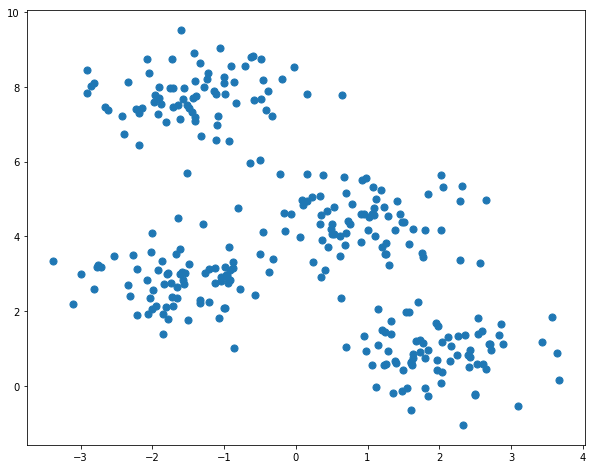

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Use K-means to find clusters

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

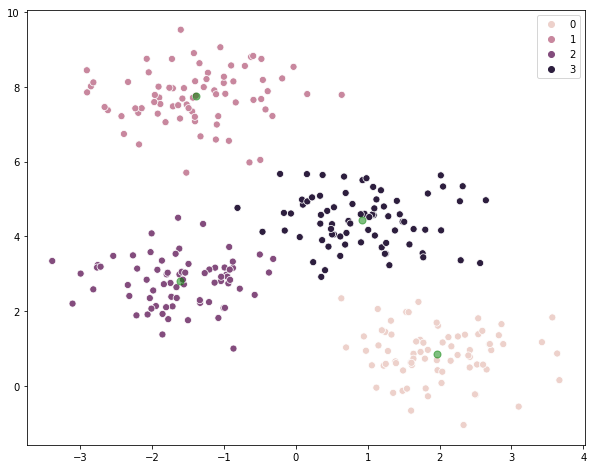

In [0]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=50, alpha=0.5);

Generate some data which is more difficult to cluster

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

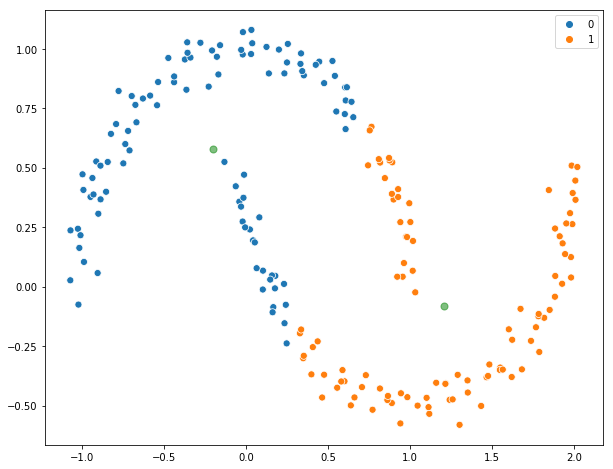

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_means = kmeans.predict(X)

sns.scatterplot(X[:, 0], X[:, 1], hue=y_means, s=50);
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', s=50, alpha=0.5);

For this data we need a better algorithm to cluster data

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


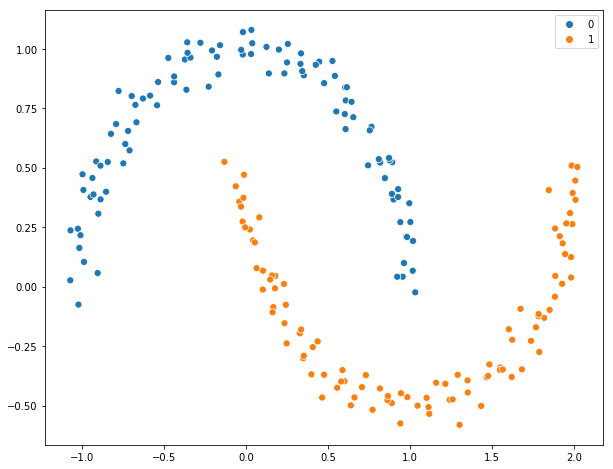

In [0]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
y_means = model.fit_predict(X)
sns.scatterplot(X[:, 0], X[:, 1], hue=y_means, s=50);
     